In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [7]:
# 이미지를 읽어오고 크기를 조정한 후 색상 변환을 수행합니다.
img = cv2.imread("./photo/goose.jpg", cv2.IMREAD_ANYCOLOR)
img = cv2.resize(img, [600, 600])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

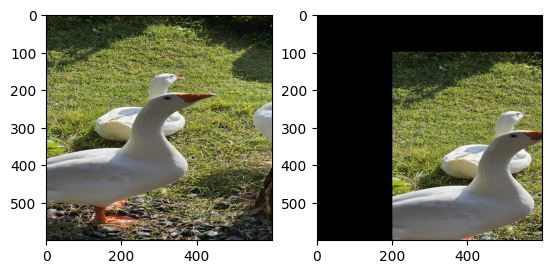

In [11]:
# 평행이동
trans = np.array([[1, 0, 200], [0, 1, 100]], dtype=np.float32) # [x축 이동, y축 이동, 이동할 거리]
img_trans = cv2.warpAffine(img, trans, (0, 0))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img_trans)

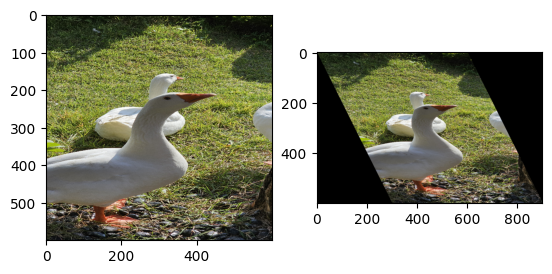

In [12]:
# 전단 변환
shear = np.array([[1, 0.5, 0], [0, 1, 0]], dtype = np.float32)

h, w = img.shape[:2]
img_shear = cv2.warpAffine(img, shear, (w + int(h * 0.5), h))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img_shear)

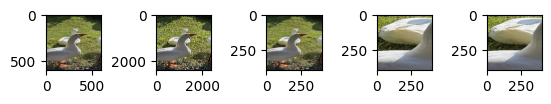

In [13]:
# 확대와 축소

img_resize1 = cv2.resize(img, (0, 0), fx=4, fy=4, interpolation=cv2.INTER_NEAREST)
img_resize2 = cv2.resize(img, (400, 400), interpolation=cv2.INTER_AREA)
img_resize3 = cv2.resize(img, (1920, 1280), interpolation=cv2.INTER_CUBIC)
img_resize4 = cv2.resize(img, (1920, 1280), interpolation=cv2.INTER_LANCZOS4)

plt.subplots_adjust(hspace=1.0, wspace=1.0)
plt.subplot(1, 5, 1)
plt.imshow(img)
plt.subplot(1, 5, 2)
plt.imshow(img_resize1)
plt.subplot(1, 5, 3)
plt.imshow(img_resize2)
plt.subplot(1, 5, 4)
plt.imshow(img_resize3[500:900, 400:800])
plt.subplot(1, 5, 5)
plt.imshow(img_resize4[500:900, 400:800])


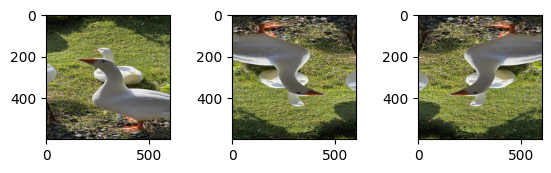

In [14]:
# 반전

img_flip1 = cv2.flip(img, 1)
img_flip2 = cv2.flip(img, 0)
img_flip3 = cv2.flip(img, -1)

plt.subplots_adjust(hspace=.5, wspace=.5)
plt.subplot(1, 3, 1)
plt.imshow(img_flip1)
plt.subplot(1,3,2)
plt.imshow(img_flip2)
plt.subplot(1,3,3)
plt.imshow(img_flip3)


[[ 1.73648178e-01 -9.84807753e-01  5.43347873e+02]
 [ 9.84807753e-01  1.73648178e-01 -4.75367792e+01]]


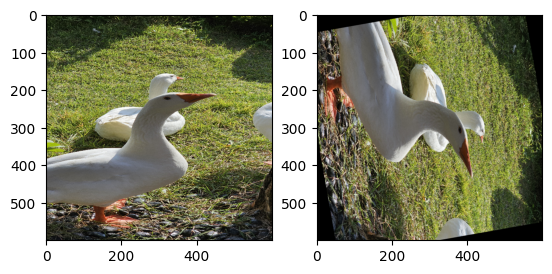

In [15]:
# 회전행렬 구하기

center_point = (img.shape[1]/2, img.shape[0]/2)
rotate_matrix = cv2.getRotationMatrix2D(center_point, -80, 1)
print(rotate_matrix)

img_rotate = cv2.warpAffine(img, rotate_matrix, (0, 0))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img_rotate)